## 2023 07/25 Color Keying

*Last Updated*: 2023-07-25

### Authors
* April Zhang (april.zhang@berkeley.edu)


### Overview
This Jupyter notebook is intended to demonstrate

* separating hand (foreground) vs background with green color

### Key Results

The key results of this experiment are ...

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from PIL import ImageFilter
import skimage

In [2]:
##Read in images
def load_images_from_folder(foldername):
    images = []
    for filename in os.listdir(foldername):
        img = cv2.imread(os.path.join(foldername,filename))
        print("read" + filename)
        if img is not None:
            images.append(img)
    return images
img_list = load_images_from_folder("/Users/aprilzhang/Downloads/test-images/")

read16B45EFF-7F1D-4437-B8FA-C7D4ADBF4F92.jpeg
read7F301A45-1207-4B6A-A05A-72B320B25E95.jpeg
read6C550AAE-8181-41AA-829C-B42D255A9E2F.jpeg
read5A7E3A5F-334A-4C8D-9E0D-BD435389C81E.jpeg
readimage007.jpg
readE4FE4EBA-68AA-434C-8260-54646D0C4AC3.jpeg


In [3]:
len(img_list)

6

In [18]:
i = 1
final_ims = []
for im in img_list:
    print('Image:' + str(i))
    image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    lower_green = np.array([25, 75, 85])     ##[R value, G value, B value], can play around with these
    upper_green = np.array([130, 255, 190]) 
    mask = cv2.inRange(image, lower_green, upper_green)
    image[mask != 0] = [0, 0, 0]
    i += 1
    final_ims.append(image)

Image:1
Image:2
Image:3
Image:4
Image:5
Image:6


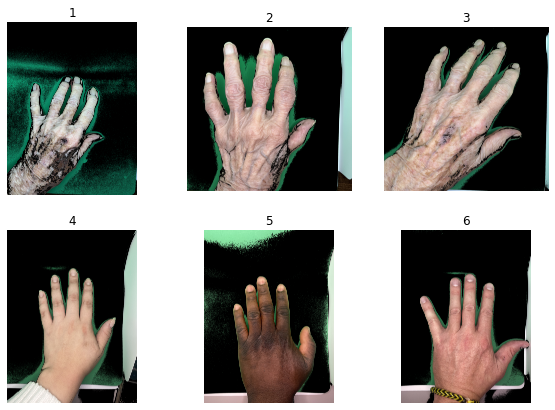

In [19]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 3
i = 1
for im in final_ims:
    fig.add_subplot(rows, columns, i)
    # showing image
    plt.imshow(im)
    plt.axis('off')
    plt.title(i)
    i += 1
  